# Convolutional Neural Network Architecture

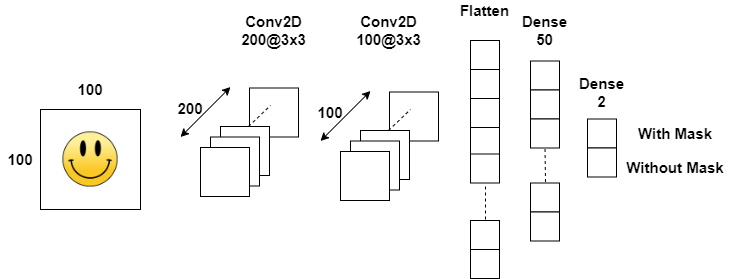

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=50,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/50
193/193 [==============================] - ETA: 0s - loss: 0.3729 - accuracy: 0.8042WARNING:tensorflow:From C:\Users\DCK\anaconda3\envs\fyp\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
193/193 [==============================] - 338s 2s/step - loss: 0.3729 - accuracy: 0.8042 - val_loss: 0.1233 - val_accuracy: 0.9552
Epoch 2/50
193/193 [==============================] - 359s 2s/step - loss: 0.1128 - accuracy: 0.9589 - val_loss: 0.1710 - val_accuracy: 0.9416
Epoch 3/50
193/193 [==============================] - 362s 2s/step - loss: 0.0811 - accur

Epoch 48/50
193/193 [==============================] - 314s 2s/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0868 - val_accuracy: 0.9838
Epoch 49/50
193/193 [==============================] - 307s 2s/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0971 - val_accuracy: 0.9831
Epoch 50/50
193/193 [==============================] - 308s 2s/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.0700 - val_accuracy: 0.9864


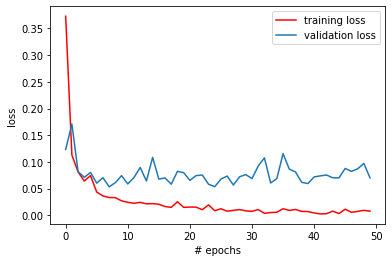

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

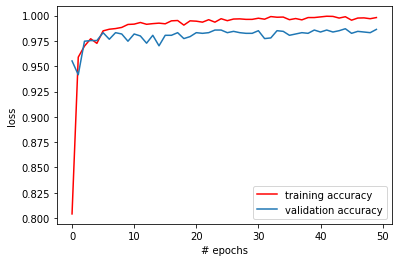

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))

27/27 [==============================] - 11s 416ms/step - loss: 0.0451 - accuracy: 0.9907
[0.0450594499707222, 0.9906542301177979]
